In [28]:
import numpy as np
import pandas as pd

file_path=r"C:/Users/Vahe/Downloads/BNB_Historical_Data.csv"
df=pd.read_csv(file_path)
df.head(20)

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2024,627.58,593.80,637.75,593.20,588.65K,5.69%
1,05/01/2024,593.80,578.41,629.98,537.50,10.58M,2.66%
2,04/01/2024,578.41,606.69,627.68,510.84,19.61M,-4.69%
3,03/01/2024,606.89,399.10,641.80,362.15,42.88M,52.06%
4,02/01/2024,399.10,300.50,426.79,296.61,22.09M,32.81%
5,01/01/2024,300.50,312.00,333.69,287.60,26.58M,-3.69%
6,12/01/2023,312.00,227.60,337.89,226.00,32.06M,37.08%
7,11/01/2023,227.60,226.30,271.14,222.60,26.47M,0.57%
8,10/01/2023,226.30,214.50,237.49,202.99,13.76M,5.50%
9,09/01/2023,214.50,216.80,221.20,204.19,9.83M,-1.01%


In [29]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

def convert_volume(vol):
    if 'K' in vol:
        return float(vol.replace('K', '')) * 1e3
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1e6
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1e9
    else:
        return float(vol)

df['Vol.'] = df['Vol.'].apply(convert_volume)

df['Change %'] = df['Change %'].str.replace('%', '').astype(float) / 100.0


df['Price_Range'] = df['High'] - df['Low']
df['Price_Change'] = df['Price'] - df['Open']
df['Daily_Return'] = df['Price'].pct_change() * 100

df['Volume_Change'] = df['Vol.'].pct_change() * 100

df['MA_7'] = df['Price'].rolling(window=7).mean()
df['MA_30'] = df['Price'].rolling(window=30).mean()

df['Vol_MA_7'] = df['Vol.'].rolling(window=7).mean()
df['Vol_MA_30'] = df['Vol.'].rolling(window=30).mean()

df['Price_Volatility_7'] = df['Price'].rolling(window=7).std()
df['Price_Volatility_30'] = df['Price'].rolling(window=30).std()

df['Lag_1'] = df['Price'].shift(1)
df['Lag_2'] = df['Price'].shift(2)
df = df.sort_values(by='Date').reset_index(drop=True)

df.head(100)

,Date,Price,Open,High,Low,Vol.,Change %,Price_Range,Price_Change,Daily_Return,Volume_Change,MA_7,MA_30,Vol_MA_7,Vol_MA_30,Price_Volatility_7,Price_Volatility_30,Lag_1,Lag_2
0,2017-12-01,8.53,1.95,11.30,1.88,32830000.0,3.3744,9.42,6.58,-24.580018,-57.573016,12.088571,15.314333,7.654143e+07,1.067170e+08,2.365505,6.895952,11.31,10.46
1,2018-01-01,11.31,8.53,24.64,7.80,77380000.0,0.3263,16.84,2.78,8.126195,13.062537,12.841429,15.543333,7.847571e+07,1.087223e+08,1.819876,6.775914,10.46,11.04
2,2018-02-01,10.46,11.31,11.85,0.00,68440000.0,-0.0757,11.85,-0.85,-5.253623,-37.406256,12.794286,15.855333,7.255143e+07,1.095397e+08,1.869749,6.789745,11.04,14.32
3,2018-03-01,11.04,10.46,14.93,7.07,109340000.0,0.0562,7.86,0.58,-22.905028,-1.031861,12.731429,16.277667,6.647571e+07,1.111157e+08,1.966210,6.836461,14.32,14.22
4,2018-04-01,14.32,11.05,15.90,10.32,110480000.0,0.2964,5.58,3.27,0.703235,83.582586,12.510000,16.887000,5.600714e+07,1.142717e+08,2.254573,7.160499,14.22,14.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2024-02-01,399.10,300.50,426.79,296.61,22090000.0,0.3281,130.18,98.60,-34.238495,-48.484142,NaN,NaN,NaN,NaN,NaN,NaN,606.89,578.41
75,2024-03-01,606.89,399.10,641.80,362.15,42880000.0,0.5206,279.65,207.79,4.923843,118.663947,NaN,NaN,NaN,NaN,NaN,NaN,578.41,593.80
76,2024-04-01,578.41,606.69,627.68,510.84,19610000.0,-0.0469,116.84,-28.28,-2.591782,85.349716,NaN,NaN,NaN,NaN,NaN,NaN,593.80,627.58
77,2024-05-01,593.80,578.41,629.98,537.50,10580000.0,0.0266,92.48,15.39,-5.382581,1697.332880,NaN,NaN,NaN,NaN,NaN,NaN,627.58,NaN


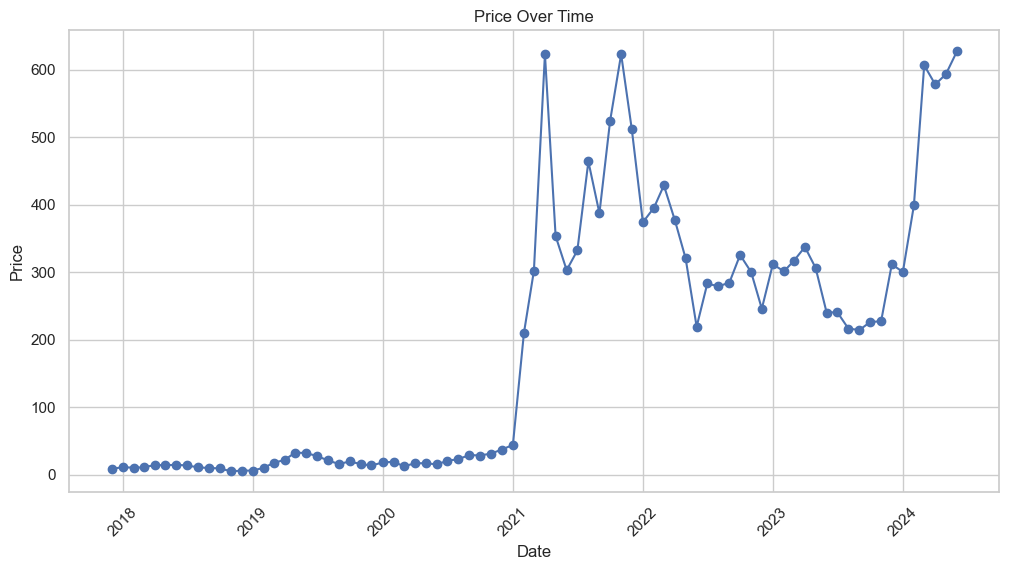

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', color='b')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

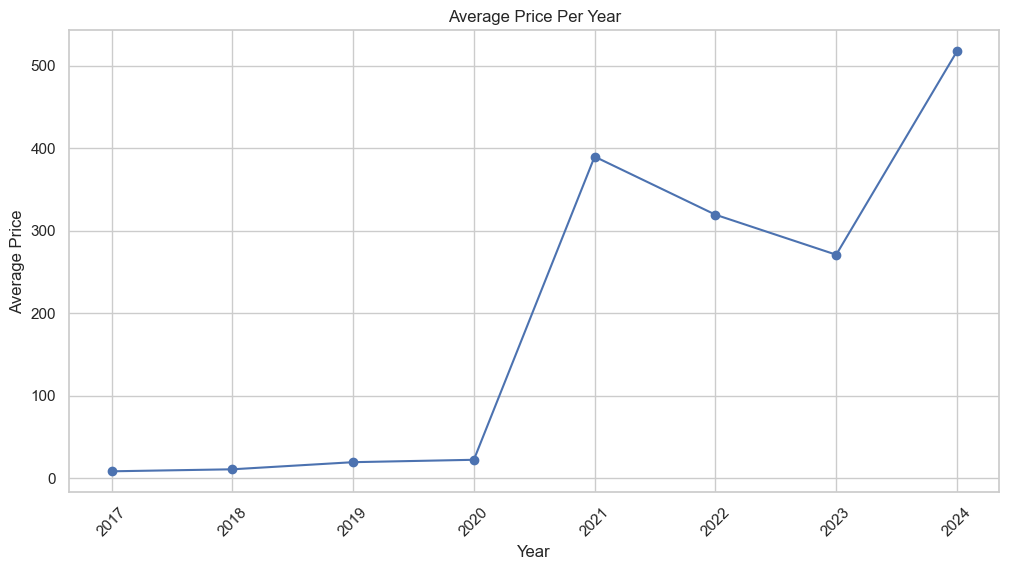

In [33]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Year'] = df['Date'].dt.year

yearly_avg_price = df.groupby('Year')['Price'].mean().reset_index()

yearly_avg_price = yearly_avg_price.sort_values(by='Year')

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_price['Year'], yearly_avg_price['Price'], marker='o', linestyle='-', color='b')
plt.title('Average Price Per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


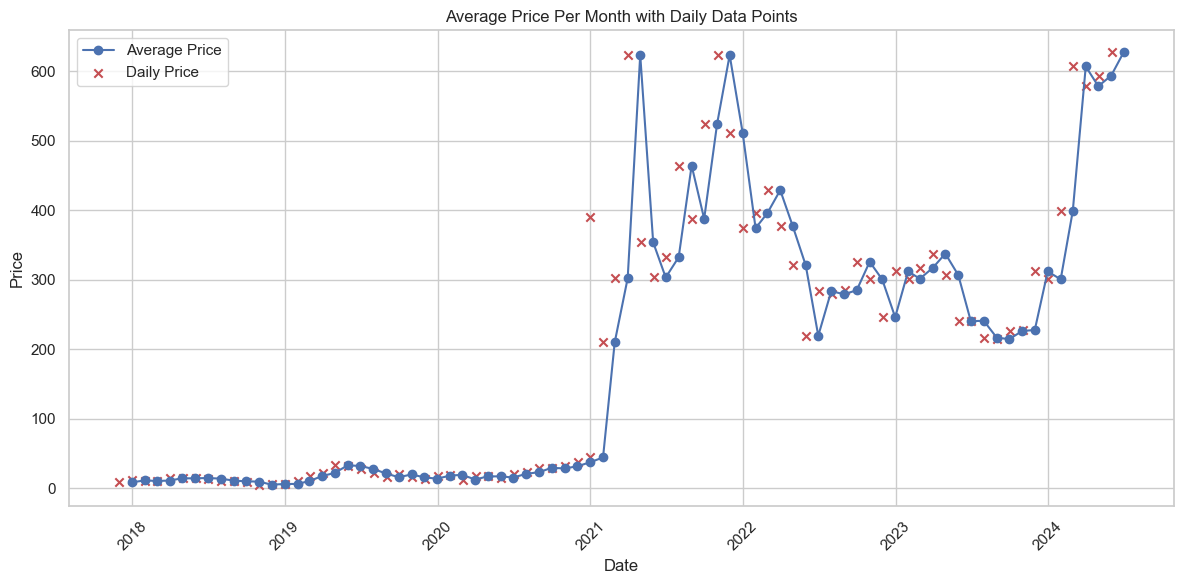